## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9723568	total: 58.6ms	remaining: 58.5s
1:	learn: 0.9523518	total: 59.5ms	remaining: 29.7s
2:	learn: 0.9325691	total: 60.5ms	remaining: 20.1s
3:	learn: 0.9163716	total: 61.5ms	remaining: 15.3s
4:	learn: 0.9012467	total: 62.6ms	remaining: 12.5s
5:	learn: 0.8838002	total: 63.7ms	remaining: 10.5s
6:	learn: 0.8673294	total: 64.6ms	remaining: 9.17s
7:	learn: 0.8519014	total: 65.5ms	remaining: 8.13s
8:	learn: 0.8358716	total: 66.4ms	remaining: 7.31s
9:	learn: 0.8206211	total: 67.3ms	remaining: 6.66s
10:	learn: 0.8053014	total: 68.1ms	remaining: 6.13s
11:	learn: 0.7900892	total: 68.9ms	remaining: 5.68s
12:	learn: 0.7753838	total: 69.8ms	remaining: 5.3s
13:	learn: 0.7604127	total: 70.6ms	remaining: 4.97s
14:	learn: 0.7471910	total: 71.4ms	remaining: 4.69s
15:	learn: 0.7331828	total: 72.1ms	remaining: 4.44s
16:	learn: 0.7214699	total: 73ms	remaining: 4.22s
17:	learn: 0.7095771	total: 73.7ms	remaining: 4.02s
18:	learn: 0.6974374	total: 74.4ms	remaining: 3

61:	learn: 0.4115387	total: 110ms	remaining: 1.66s
62:	learn: 0.4085561	total: 111ms	remaining: 1.65s
63:	learn: 0.4051438	total: 111ms	remaining: 1.63s
64:	learn: 0.4017282	total: 112ms	remaining: 1.61s
65:	learn: 0.3988312	total: 113ms	remaining: 1.6s
66:	learn: 0.3953775	total: 114ms	remaining: 1.59s
67:	learn: 0.3912746	total: 115ms	remaining: 1.57s
68:	learn: 0.3877880	total: 116ms	remaining: 1.56s
69:	learn: 0.3849188	total: 116ms	remaining: 1.55s
70:	learn: 0.3813490	total: 117ms	remaining: 1.53s
71:	learn: 0.3777100	total: 118ms	remaining: 1.52s
72:	learn: 0.3752152	total: 119ms	remaining: 1.5s
73:	learn: 0.3720445	total: 119ms	remaining: 1.49s
74:	learn: 0.3692735	total: 120ms	remaining: 1.48s
75:	learn: 0.3668144	total: 121ms	remaining: 1.47s
76:	learn: 0.3634007	total: 122ms	remaining: 1.46s
77:	learn: 0.3609115	total: 123ms	remaining: 1.45s
78:	learn: 0.3580863	total: 123ms	remaining: 1.44s
79:	learn: 0.3556418	total: 124ms	remaining: 1.43s
80:	learn: 0.3528741	total: 125ms

159:	learn: 0.2444154	total: 192ms	remaining: 1.01s
160:	learn: 0.2432342	total: 193ms	remaining: 1s
161:	learn: 0.2427312	total: 194ms	remaining: 1s
162:	learn: 0.2420088	total: 194ms	remaining: 998ms
163:	learn: 0.2417152	total: 195ms	remaining: 995ms
164:	learn: 0.2411516	total: 196ms	remaining: 992ms
165:	learn: 0.2401490	total: 197ms	remaining: 989ms
166:	learn: 0.2395667	total: 197ms	remaining: 985ms
167:	learn: 0.2385686	total: 198ms	remaining: 982ms
168:	learn: 0.2378917	total: 199ms	remaining: 979ms
169:	learn: 0.2371957	total: 200ms	remaining: 976ms
170:	learn: 0.2363475	total: 201ms	remaining: 973ms
171:	learn: 0.2358781	total: 202ms	remaining: 970ms
172:	learn: 0.2350954	total: 202ms	remaining: 967ms
173:	learn: 0.2344586	total: 203ms	remaining: 964ms
174:	learn: 0.2336809	total: 204ms	remaining: 962ms
175:	learn: 0.2330249	total: 205ms	remaining: 959ms
176:	learn: 0.2321736	total: 206ms	remaining: 957ms
177:	learn: 0.2314433	total: 207ms	remaining: 954ms
178:	learn: 0.2312

291:	learn: 0.1769429	total: 300ms	remaining: 727ms
292:	learn: 0.1765326	total: 301ms	remaining: 726ms
293:	learn: 0.1764082	total: 302ms	remaining: 724ms
294:	learn: 0.1758988	total: 303ms	remaining: 723ms
295:	learn: 0.1754152	total: 304ms	remaining: 722ms
296:	learn: 0.1751289	total: 304ms	remaining: 720ms
297:	learn: 0.1748159	total: 305ms	remaining: 719ms
298:	learn: 0.1745095	total: 306ms	remaining: 717ms
299:	learn: 0.1742534	total: 307ms	remaining: 716ms
300:	learn: 0.1741802	total: 308ms	remaining: 716ms
301:	learn: 0.1738106	total: 309ms	remaining: 715ms
302:	learn: 0.1736945	total: 310ms	remaining: 713ms
303:	learn: 0.1732762	total: 311ms	remaining: 712ms
304:	learn: 0.1730378	total: 312ms	remaining: 711ms
305:	learn: 0.1723972	total: 313ms	remaining: 709ms
306:	learn: 0.1721811	total: 314ms	remaining: 708ms
307:	learn: 0.1718886	total: 314ms	remaining: 706ms
308:	learn: 0.1712981	total: 315ms	remaining: 705ms
309:	learn: 0.1711856	total: 316ms	remaining: 704ms
310:	learn: 

390:	learn: 0.1483691	total: 382ms	remaining: 594ms
391:	learn: 0.1479236	total: 383ms	remaining: 593ms
392:	learn: 0.1477081	total: 383ms	remaining: 592ms
393:	learn: 0.1474585	total: 384ms	remaining: 591ms
394:	learn: 0.1471570	total: 385ms	remaining: 590ms
395:	learn: 0.1469778	total: 386ms	remaining: 589ms
396:	learn: 0.1465722	total: 387ms	remaining: 587ms
397:	learn: 0.1462199	total: 387ms	remaining: 586ms
398:	learn: 0.1460530	total: 388ms	remaining: 585ms
399:	learn: 0.1456878	total: 389ms	remaining: 584ms
400:	learn: 0.1452309	total: 390ms	remaining: 583ms
401:	learn: 0.1450909	total: 391ms	remaining: 581ms
402:	learn: 0.1449710	total: 392ms	remaining: 580ms
403:	learn: 0.1448197	total: 393ms	remaining: 579ms
404:	learn: 0.1446797	total: 393ms	remaining: 578ms
405:	learn: 0.1442764	total: 394ms	remaining: 577ms
406:	learn: 0.1439541	total: 395ms	remaining: 575ms
407:	learn: 0.1438221	total: 396ms	remaining: 574ms
408:	learn: 0.1434968	total: 397ms	remaining: 573ms
409:	learn: 

517:	learn: 0.1173240	total: 491ms	remaining: 457ms
518:	learn: 0.1170725	total: 492ms	remaining: 456ms
519:	learn: 0.1169223	total: 493ms	remaining: 455ms
520:	learn: 0.1166454	total: 494ms	remaining: 454ms
521:	learn: 0.1164515	total: 494ms	remaining: 453ms
522:	learn: 0.1161583	total: 495ms	remaining: 452ms
523:	learn: 0.1158241	total: 496ms	remaining: 451ms
524:	learn: 0.1157261	total: 497ms	remaining: 450ms
525:	learn: 0.1156594	total: 498ms	remaining: 448ms
526:	learn: 0.1155833	total: 498ms	remaining: 447ms
527:	learn: 0.1152429	total: 499ms	remaining: 446ms
528:	learn: 0.1149639	total: 500ms	remaining: 445ms
529:	learn: 0.1148878	total: 501ms	remaining: 444ms
530:	learn: 0.1146913	total: 502ms	remaining: 444ms
531:	learn: 0.1145887	total: 503ms	remaining: 443ms
532:	learn: 0.1144826	total: 504ms	remaining: 442ms
533:	learn: 0.1142465	total: 505ms	remaining: 440ms
534:	learn: 0.1139905	total: 505ms	remaining: 439ms
535:	learn: 0.1139110	total: 506ms	remaining: 438ms
536:	learn: 

596:	learn: 0.1029110	total: 555ms	remaining: 375ms
597:	learn: 0.1027613	total: 556ms	remaining: 374ms
598:	learn: 0.1025587	total: 557ms	remaining: 373ms
599:	learn: 0.1023285	total: 559ms	remaining: 372ms
600:	learn: 0.1020607	total: 559ms	remaining: 371ms
601:	learn: 0.1018224	total: 560ms	remaining: 371ms
602:	learn: 0.1016915	total: 561ms	remaining: 369ms
603:	learn: 0.1015392	total: 562ms	remaining: 368ms
604:	learn: 0.1013569	total: 563ms	remaining: 367ms
605:	learn: 0.1011760	total: 564ms	remaining: 366ms
606:	learn: 0.1009884	total: 564ms	remaining: 365ms
607:	learn: 0.1007937	total: 565ms	remaining: 365ms
608:	learn: 0.1006845	total: 566ms	remaining: 364ms
609:	learn: 0.1005461	total: 567ms	remaining: 362ms
610:	learn: 0.1003986	total: 568ms	remaining: 361ms
611:	learn: 0.1003205	total: 569ms	remaining: 360ms
612:	learn: 0.1001331	total: 569ms	remaining: 359ms
613:	learn: 0.0998940	total: 570ms	remaining: 358ms
614:	learn: 0.0998311	total: 571ms	remaining: 357ms
615:	learn: 

719:	learn: 0.0856372	total: 664ms	remaining: 258ms
720:	learn: 0.0854723	total: 665ms	remaining: 257ms
721:	learn: 0.0854114	total: 666ms	remaining: 256ms
722:	learn: 0.0852241	total: 667ms	remaining: 256ms
723:	learn: 0.0850595	total: 668ms	remaining: 255ms
724:	learn: 0.0849290	total: 669ms	remaining: 254ms
725:	learn: 0.0848418	total: 669ms	remaining: 253ms
726:	learn: 0.0847275	total: 670ms	remaining: 252ms
727:	learn: 0.0846013	total: 671ms	remaining: 251ms
728:	learn: 0.0845448	total: 672ms	remaining: 250ms
729:	learn: 0.0843103	total: 673ms	remaining: 249ms
730:	learn: 0.0841172	total: 674ms	remaining: 248ms
731:	learn: 0.0840699	total: 674ms	remaining: 247ms
732:	learn: 0.0838985	total: 675ms	remaining: 246ms
733:	learn: 0.0837383	total: 676ms	remaining: 245ms
734:	learn: 0.0835143	total: 677ms	remaining: 244ms
735:	learn: 0.0833864	total: 678ms	remaining: 243ms
736:	learn: 0.0833482	total: 678ms	remaining: 242ms
737:	learn: 0.0832471	total: 679ms	remaining: 241ms
738:	learn: 

816:	learn: 0.0743064	total: 746ms	remaining: 167ms
817:	learn: 0.0741995	total: 747ms	remaining: 166ms
818:	learn: 0.0740307	total: 747ms	remaining: 165ms
819:	learn: 0.0739324	total: 748ms	remaining: 164ms
820:	learn: 0.0737869	total: 749ms	remaining: 163ms
821:	learn: 0.0737654	total: 750ms	remaining: 162ms
822:	learn: 0.0736839	total: 751ms	remaining: 161ms
823:	learn: 0.0735369	total: 752ms	remaining: 161ms
824:	learn: 0.0734115	total: 753ms	remaining: 160ms
825:	learn: 0.0732652	total: 753ms	remaining: 159ms
826:	learn: 0.0731031	total: 754ms	remaining: 158ms
827:	learn: 0.0730715	total: 755ms	remaining: 157ms
828:	learn: 0.0729482	total: 756ms	remaining: 156ms
829:	learn: 0.0728268	total: 757ms	remaining: 155ms
830:	learn: 0.0727357	total: 758ms	remaining: 154ms
831:	learn: 0.0726659	total: 758ms	remaining: 153ms
832:	learn: 0.0725302	total: 760ms	remaining: 152ms
833:	learn: 0.0724311	total: 760ms	remaining: 151ms
834:	learn: 0.0723280	total: 761ms	remaining: 150ms
835:	learn: 

945:	learn: 0.0625490	total: 854ms	remaining: 48.8ms
946:	learn: 0.0625082	total: 855ms	remaining: 47.9ms
947:	learn: 0.0624991	total: 856ms	remaining: 47ms
948:	learn: 0.0624091	total: 857ms	remaining: 46ms
949:	learn: 0.0623471	total: 858ms	remaining: 45.1ms
950:	learn: 0.0622327	total: 858ms	remaining: 44.2ms
951:	learn: 0.0621557	total: 859ms	remaining: 43.3ms
952:	learn: 0.0620221	total: 860ms	remaining: 42.4ms
953:	learn: 0.0618829	total: 861ms	remaining: 41.5ms
954:	learn: 0.0617972	total: 862ms	remaining: 40.6ms
955:	learn: 0.0616605	total: 862ms	remaining: 39.7ms
956:	learn: 0.0616308	total: 863ms	remaining: 38.8ms
957:	learn: 0.0615201	total: 864ms	remaining: 37.9ms
958:	learn: 0.0614324	total: 865ms	remaining: 37ms
959:	learn: 0.0613027	total: 866ms	remaining: 36.1ms
960:	learn: 0.0612304	total: 867ms	remaining: 35.2ms
961:	learn: 0.0611502	total: 868ms	remaining: 34.3ms
962:	learn: 0.0610391	total: 869ms	remaining: 33.4ms
963:	learn: 0.0609941	total: 869ms	remaining: 32.5ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

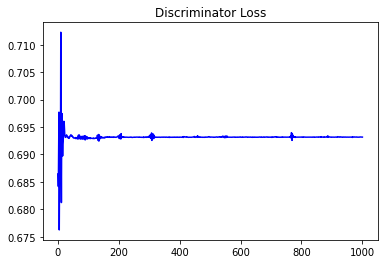

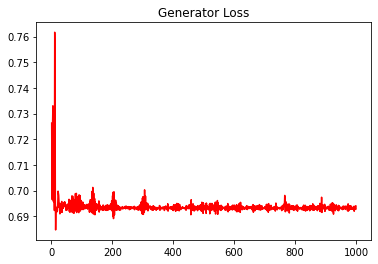

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12639063750873836


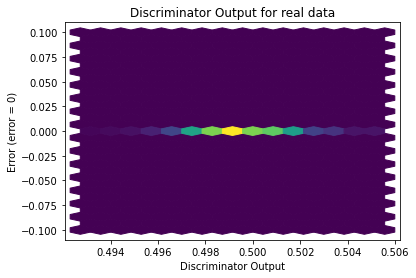

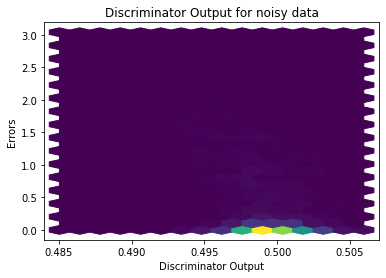

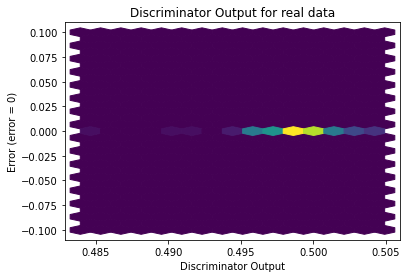

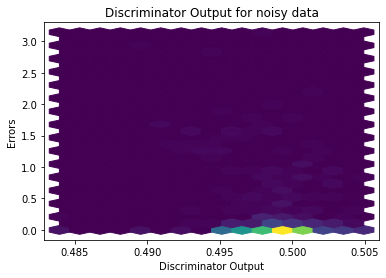

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


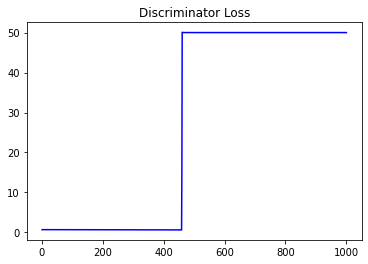

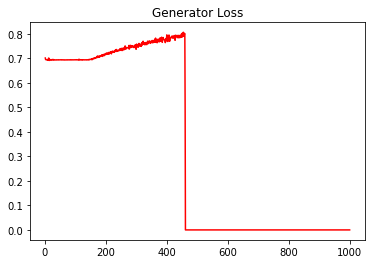

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
199.2476317136998


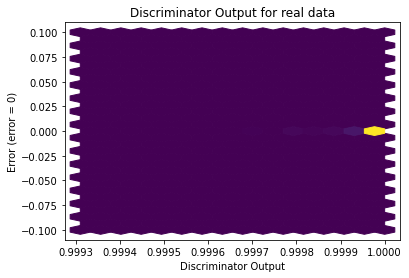

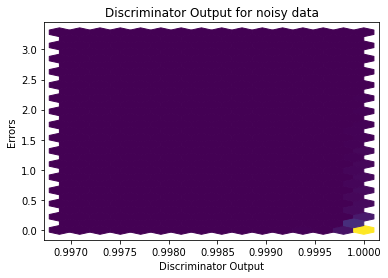

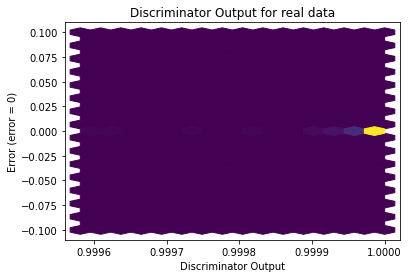

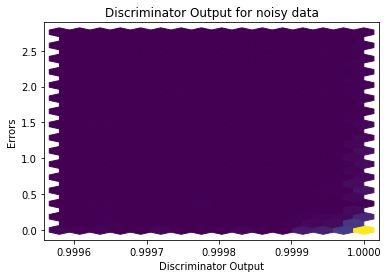

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0397]], requires_grad=True)
